# **Car Prediction 2000 - 2023**

# **1. Introduction**


---

Nama : Muhammad Aldzahabi Mawarid

Batch : HCK-034

Objective :
Membantu pengguna dan dealer dalam menentukan estimasi harga mobil tahun 2000 hingga 2023 yang optimal untuk kebutuhan jual/beli agar keputusan lebih cepat, akurat, dan mengurangi risiko kerugian.


---

# **2. Problem Statement and Dataset Description**

## **Latar belakang dataset**

Industri otomotif adalah salah satu pasar terbesar yang selalu berubah dan memiliki dinamika harga yang kompleks. Harga mobil bekas tidak ditentukan oleh satu faktor saja, tetapi dipengaruhi oleh berbagai aspek seperti merek, tahun produksi, kondisi kendaraan, ukuran mesin, jenis bahan bakar, jarak tempuh, hingga tipe transmisi.

Bagi konsumen maupun dealer mobil, menentukan harga mobil bekas yang akurat adalah tantangan besar. Kesalahan dalam menentukan harga dapat menimbulkan kerugian finansial, baik untuk penjual maupun pembeli. Oleh karena itu, analisis data berbasis machine learning dibutuhkan untuk memprediksi harga secara lebih tepat dan objektif.

## **SMART**

Sebagai tim Data Science, saya ingin membangun model machine learning berbasis regresi untuk memprediksi harga mobil menggunakan data tahun 2000–2023.


## **Sumber Dataset**

Dataset ini berasal dari platform Kaggle dan berjudul “Car Price Prediction” Dataset ini berisi data terkait brand mobil, tahun pembuatan mobil, tipe bahan bakar, harga, dan lain-lainnya. Kemudian di download dan di simpan pada 'car_price_prediction_.csv'.

# **3. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from feature_engine.outliers import Winsorizer
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import joblib
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

# **4. Data Loading**

In [2]:
# Menyimpan dataset mentah pada variable df_raw
df_raw = pd.read_csv('car_price_prediction_.csv')

df_eda = df_raw.copy()

df_eda

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [3]:
# Chekck summary dataset
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


- Jumlah kolom pada dataset ini adalah 10, dengan total 2500 baris data
- Untuk tipe data dari masing-masing sudah sesuai

In [4]:
# Check duplikasi dataset
df_eda.duplicated().sum()

0

- Dataset ini tidak memiliki data duplikat pada dataset ini, sehingga tidak ada perlakuan khusus seperti membuang data duplikat

In [5]:
# Check Missing value
df_eda.isna().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

- Dataset ini tidak memiliki missing value, sehingga tidak ada perlakuan khusus seperti handle missing value

In [6]:
# Ringkasan dataset dari kolom numeric
df_eda.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


- Dalam data set ini, diperkirakan bahwa penyebaran datanya cenderung tidak luas, dikarenakan dari setiap kolom memiliki nilai nilai mean yang lebih tinggi dari standard deviasinya.
- Tetapi pada kolom Mileage itu memiliki rentang yang cukup jauh terhadap nilai minimal dan maximalnya, sehingga outlier mungkin saja ada dan data bisa skew

# **5. Exploratory Data Analysis (EDA)**

## **Pertanyaan**

## 1. Brand apa yang sering muncul & bagaimana distribusi harganya?

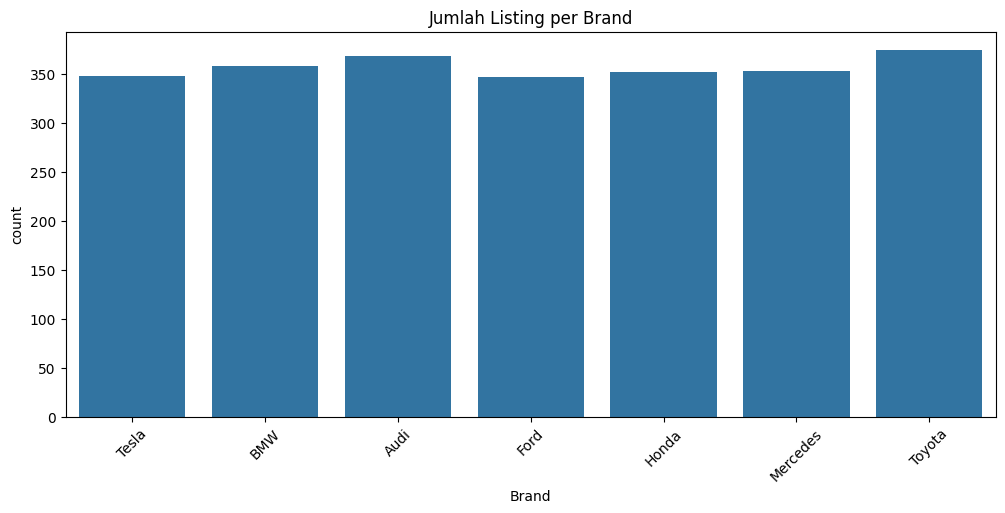

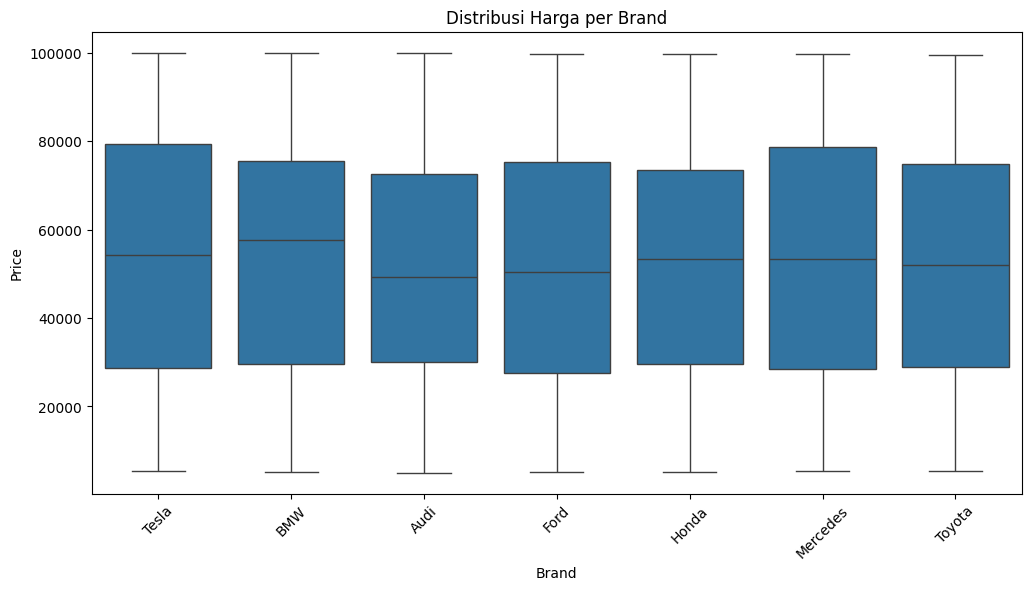

In [7]:

plt.figure(figsize=(12,5))
sns.countplot(x='Brand', data=df_eda)
plt.xticks(rotation=45)
plt.title("Jumlah Listing per Brand")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Brand', y='Price', data=df_eda)
plt.xticks(rotation=45)
plt.title("Distribusi Harga per Brand")
plt.show()

- Dari visualisasi Jumlah Listing per Brand bisa dilihat, bahwa Brand yan sering muncul adalah Toyota dengan jumlah 374, diikuti Audi dengan jumlah 368, dan yang terendah yaitu Ford dengan jumlah 347.
- Berdasarkan boxplot, bentuk boxplot umumnya Tesla memiliki nilai median harga tertinggi. Tesla cenderung brand paling mahal di dataset.
- Toyota, Honda, Ford cenderung lebih murah, Karena median-nya lebih rendah dibanding Audi, BMW, Tesla, Mercedes.
- dan BMW dan Mercedes, memiliki variance yang tinggi atau variasi harga relatif banyak dari yang murah ke mahal.
- Distribusi semua brandnya mirip lebar whisker-nya, harga naik-turunnya tidak terlalu ekstrem per brand, tapi tetap terlihat segmennya.


Boxplot menunjukkan gap yang jelas antara brand premium dan brand mass-market. Tesla memiliki median tertinggi, sedangkan Toyota dan Ford memiliki harga median yang lebih rendah


## 2. Hubungan Tahun produksi vs Harga

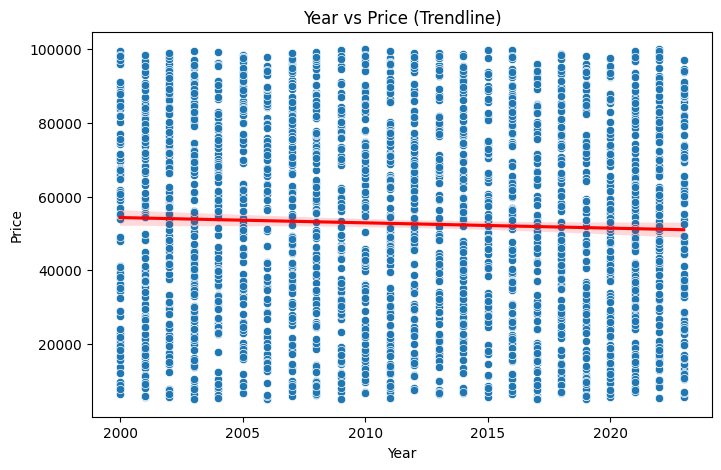

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Year', y='Price', data=df_eda)
sns.regplot(x='Year', y='Price', data=df_eda, scatter=False, color='red')
plt.title("Year vs Price (Trendline)")
plt.show()

- Dapat dilihat pada red line yan menunjukan bahwa Trendline turun, mobil makin tua harga makin murah (depresiasi normal).
- Penyebaran harga sangat besar, jenis mobil sangat bervariasi dalam dataset.
- Tahun pembuatan bukan prediktor kuat harga jika merek/tipe tidak dipisah.

## 3. Apakah Engine size mempengaruhi harga?


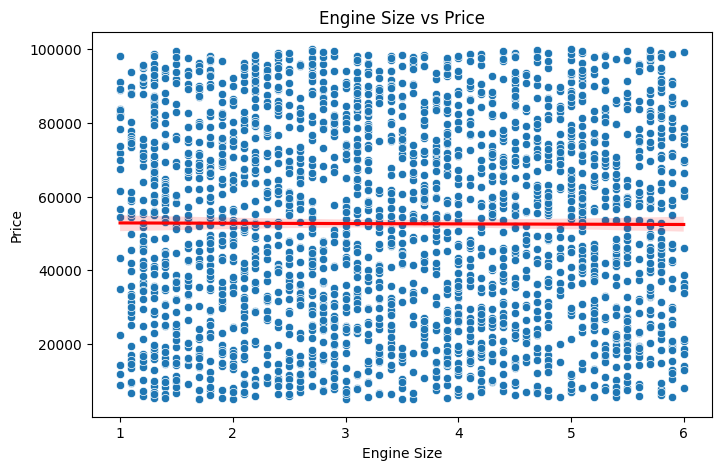

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Engine Size', y='Price', data=df_eda)
sns.regplot(x='Engine Size', y='Price', data=df_eda, scatter=False, color='red')
plt.title("Engine Size vs Price")
plt.show()

1. Mesin lebih besar sedikit lebih mahal, tetapi efeknya sangat lemah dalam dataset.
2. Harga sangat bervariasi di semua ukuran mesin, faktor lain dominan.
3. Trendline naik tipis, artinya ada hubungan positif, tapi tidak berarti.

## 4. Distribusi Mileage & Hubungan Mileage vs harga

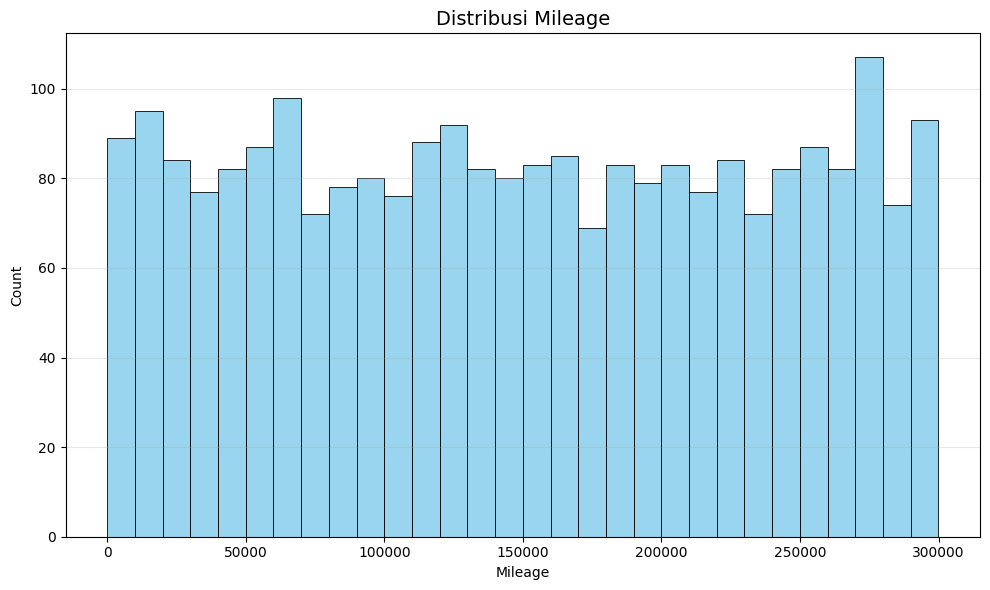

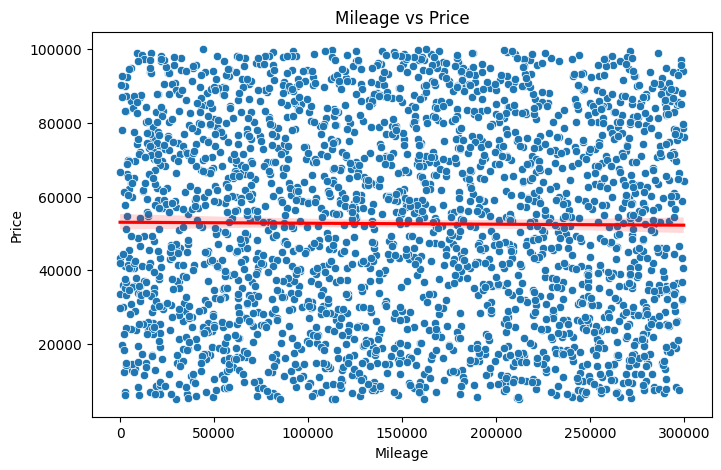

In [10]:
plt.figure(figsize=(10,6))

plt.hist(
    df_eda['Mileage'], 
    bins=30,
    color='skyblue',      
    edgecolor='black',   
    linewidth=0.7,        
    alpha=0.85           
)

plt.title("Distribusi Mileage", fontsize=14)
plt.xlabel("Mileage")
plt.ylabel("Count")

plt.grid(axis='y', alpha=0.3)  

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Mileage', y='Price', data=df_eda)
sns.regplot(x='Mileage', y='Price', data=df_eda, scatter=False, color='red')
plt.title("Mileage vs Price")
plt.show()

Analisis visualisasi menunjukkan bahwa meskipun distribusi jarak tempuh (*Mileage*) kendaraan (rentang 0 hingga 300.000) relatif merata, **harga** (*Price*) mobil **tidak menunjukkan korelasi sama sekali** dengan jarak tempuh, garis tren regresi hampir horizontal, dan variasi harga sangat tinggi di semua tingkat jarak tempuh. Anomali ini mengindikasikan bahwa *Mileage*, yang seharusnya menjadi faktor penentu harga utama di pasar mobil bekas, diabaikan, atau data saat ini kehilangan variabel-variabel kunci yang benar-benar mendorong harga (seperti **Model, Tahun Pembuatan, dan Kondisi**). Situasi ini menimbulkan risiko kesalahan penetapan harga, di mana mobil berkualitas baik mungkin dijual terlalu murah dan mobil yang sudah tua atau berjarak tempuh tinggi mungkin dihargai terlalu mahal, yang pada akhirnya dapat merugikan profitabilitas bisnis.

## 5. Perbandingan harga berdasarkan Fuel Type

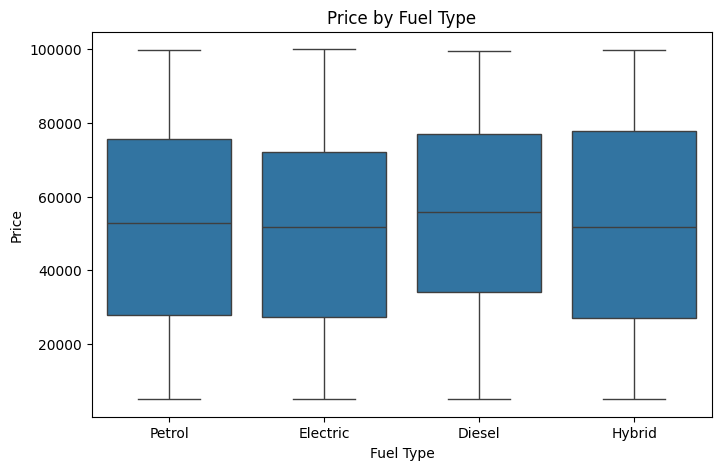

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel Type', y='Price', data=df_eda)
plt.title("Price by Fuel Type")
plt.show()


Visualisasi Box Plot menunjukkan bahwa, secara keseluruhan, distribusi harga untuk empat jenis bahan bakar (Petrol, Electric, Diesel, Hybrid) memiliki nilai median yang sangat berdekatan (sekitar $50,000 hingga $57,000) dan variabilitas yang luas (dari di bawah $10,000 hingga hampir $100,000). Meskipun demikian, jenis Diesel dan Hybrid menunjukkan sedikit keunggulan, di mana median dan kuartil atas (Q3) mereka berada pada tingkat harga yang sedikit lebih tinggi (mendekati $78,000), menunjukkan bahwa model-model paling mahal dalam inventaris cenderung menggunakan bahan bakar ini. Ketiadaan perbedaan harga yang signifikan pada tingkat median (terutama antara Electric dan Petrol) mengindikasikan bahwa jenis bahan bakar bukanlah faktor penentu harga tunggal, oleh karena itu, strategi harga tidak boleh didasarkan hanya pada jenis bahan bakar, melainkan perlu dipertimbangkan bersama dengan variabel penting lainnya.

Rekomendasi Bisnis Utama:

Validasi Premium Harga: Selidiki mengapa mobil Electric tidak menunjukkan median harga yang lebih tinggi dibandingkan Petrol; ini mungkin menunjukkan peluang untuk menyesuaikan harga jual jika inventaris mobil listrik didominasi oleh model baru atau premium.

Fokus Inventaris Premium: Untuk memaksimalkan pendapatan dari segmen harga atas, prioritaskan akuisisi dan pemasaran model Diesel dan Hybrid karena jenis ini mendominasi kuartil harga tertinggi.

Integrasi Variabel: Gunakan Jenis Bahan Bakar sebagai variabel pendukung (sekunder), dan selalu dasarkan keputusan penetapan harga utama pada Model/Merek dan Tahun Pembuatan, karena ini adalah faktor yang menyebabkan rentang harga yang sangat luas di semua kategori.

## 6. Kondisi Mobil : distribusi & rata-rata harganya

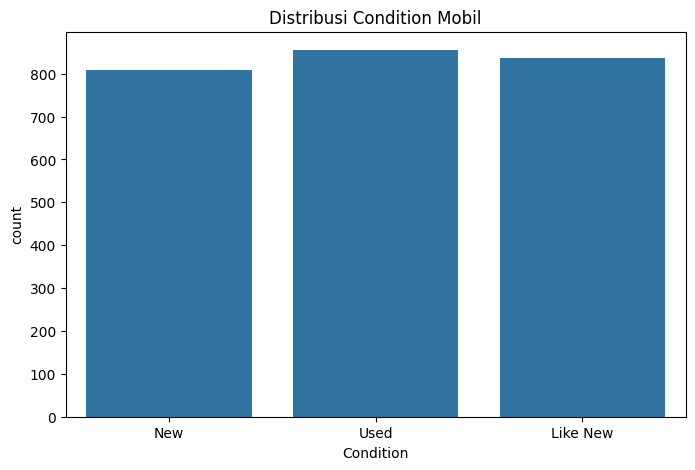

In [12]:
# Count kondisi

plt.figure(figsize=(8,5))
sns.countplot(x='Condition', data=df_eda)
plt.title("Distribusi Condition Mobil")
plt.show()

# Rata-rata harga per kondisi

cond_avg = df_eda.groupby('Condition')['Price'].mean().reset_index()

Analisis dua visualisasi menunjukkan bahwa inventaris kendaraan memiliki distribusi yang sangat seimbang di antara tiga kategori kondisi utama (New, Used, dan Like New), di mana setiap kategori memiliki jumlah count yang hampir sama (sekitar 810 hingga 850 unit). Keseimbangan inventaris ini menunjukkan basis pasar yang luas, tetapi analisis harga menunjukkan bahwa variabel Jenis Bahan Bakar tidak menyebabkan pemisahan harga yang signifikan; semua jenis bahan bakar (Petrol, Electric, Diesel, Hybrid) memiliki median harga yang berdekatan (antara $50,000 dan $57,000) dengan rentang harga keseluruhan yang sangat lebar (dari minimum hingga $100,000). Meskipun Diesel dan Hybrid menunjukkan sedikit kecenderungan harga yang lebih tinggi di kuartil atas, fakta bahwa harga tidak didorong secara kuat oleh Jenis Bahan Bakar atau Mileage (seperti pada analisis sebelumnya) memperkuat perlunya menggabungkan variabel Kondisi ini bersama dengan Model dan Tahun untuk menciptakan model penetapan harga yang akurat, daripada mengandalkan segmentasi tunggal yang saat ini kurang memisahkan nilai secara efektif.

## 7. korelasi fitur utama terhadap harga (Heatmap)

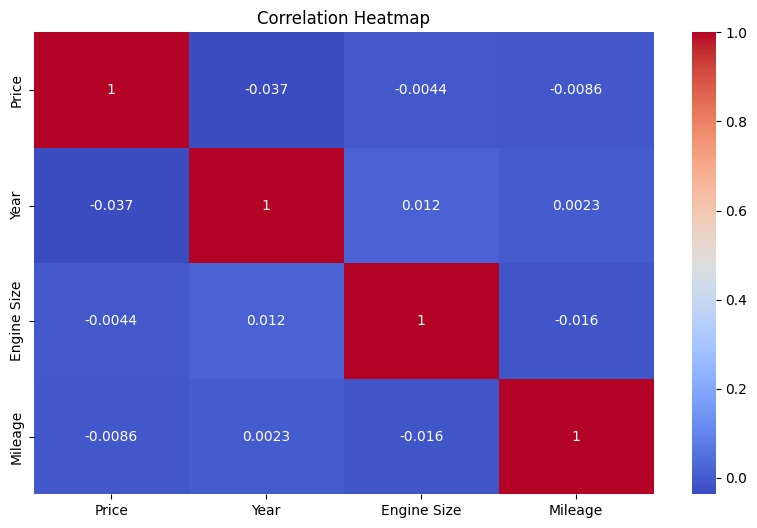

In [13]:
plt.figure(figsize=(10,6))

cols = ['Price', 'Year', 'Engine Size', 'Mileage']
sns.heatmap(df_eda[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Analisis keseluruhan dataset kendaraan bekas menunjukkan adanya anomali signifikan dalam model penetapan harga saat ini, di mana Heatmap Korelasi mengungkapkan bahwa tidak ada variabel kuantitatif (termasuk Year, Engine Size, dan Mileage) yang memiliki korelasi linear yang kuat dengan Price, dengan semua koefisien korelasi sangat mendekati nol. Hal ini menguatkan temuan dari Box Plot Harga vs Jenis Bahan Bakar, yang menunjukkan bahwa semua kategori bahan bakar memiliki median harga yang serupa, membuktikan bahwa variabel prediktif utama untuk harga (seperti Model/Merek) hilang dari analisis kuantitatif ini. Meskipun demikian, data menunjukkan adanya keseimbangan inventaris yang baik antara kategori kondisi (New, Used, dan Like New), yang masing-masing memiliki jumlah unit yang hampir sama, mengindikasikan bahwa bisnis ini memiliki cakupan pasar yang luas namun memerlukan pembaruan segera pada logika penetapan harga dengan memperkaya data dan mengembangkan model multivariat yang mengintegrasikan variabel kualitatif yang hilang.

## 8. Persentase Jumlah Brand, Fuel Type, Transmission, Condition, Model

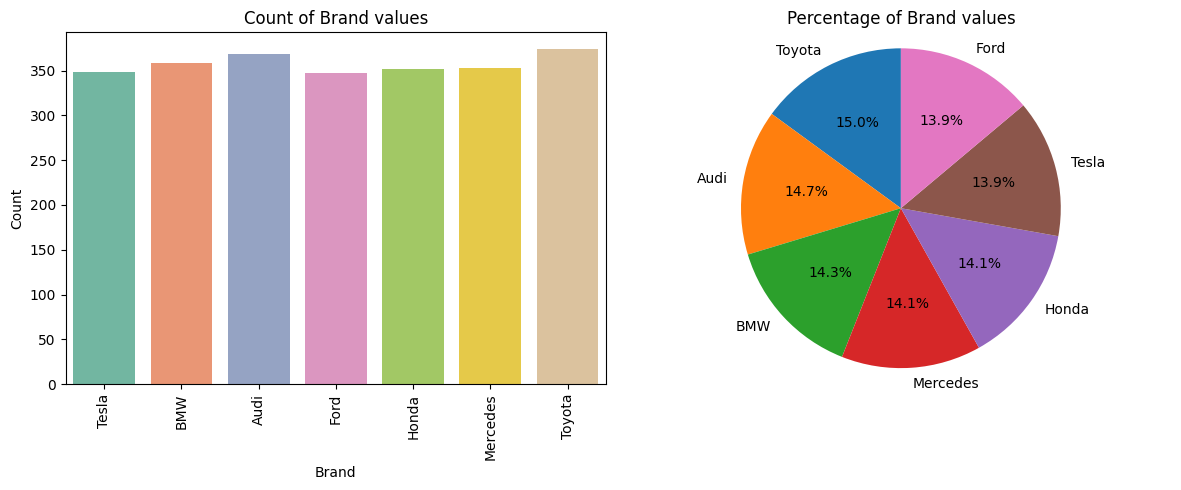

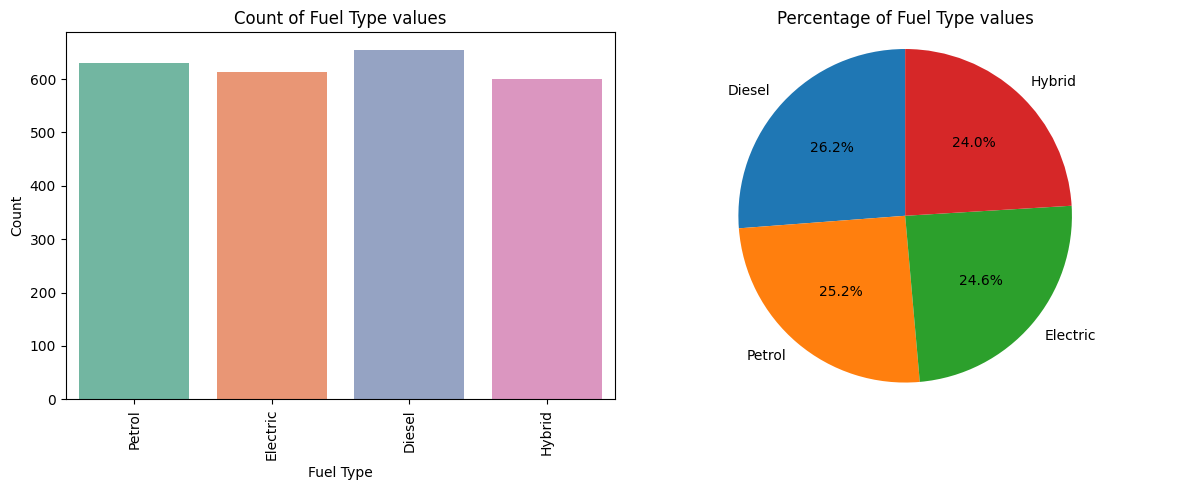

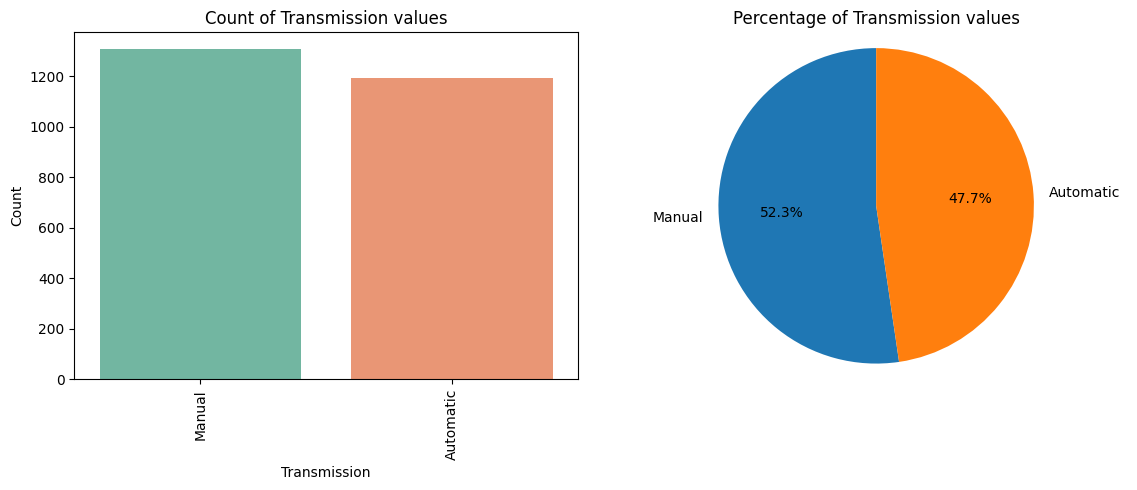

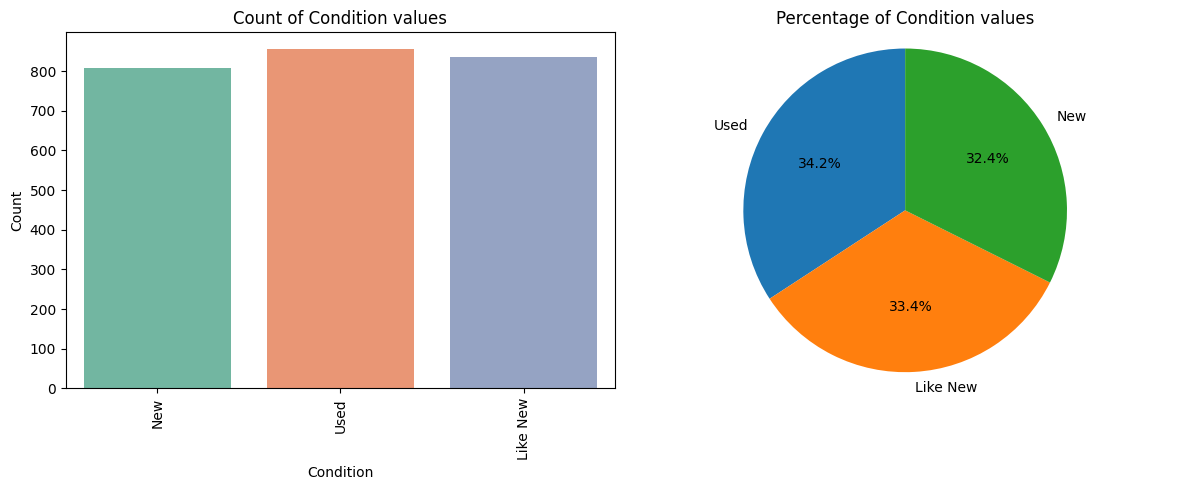

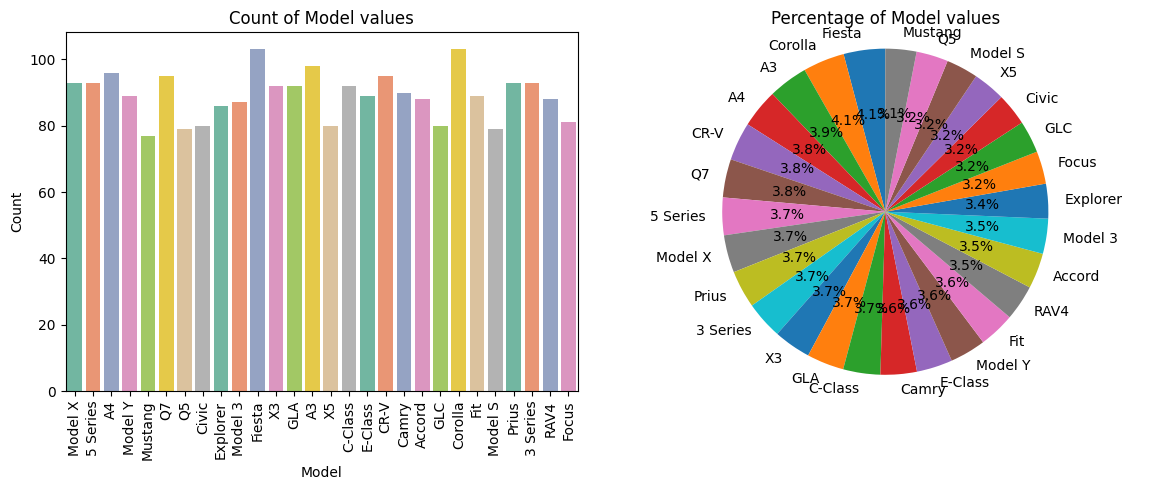

In [14]:
catgorical_values = df_eda.select_dtypes(include=["object"])

for catgorical in catgorical_values:
    counts = df_eda[catgorical].value_counts()
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df_eda, x = catgorical, palette = "Set2")
    plt.title(f"Count of {catgorical} values")
    plt.xticks(rotation = 90)
    plt.ylabel("Count")
    # plt.show()

    plt.subplot(1,2,2)
    # plt.figure(figsize = (12,5))
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=90)
    plt.title(f"Percentage of {catgorical} values")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()
    print("\n")

analisis ringkas dari semua visualisasi data dalam empat poin utama, berfokus pada distribusi kunci dan masalah korelasi harga:Variabel Kuantitatif Tidak Relevan untuk Harga (Korelasi): Heatmap Korelasi menunjukkan bahwa variabel kuantitatif kunci seperti Year (Tahun), Engine Size (Ukuran Mesin), dan Mileage (Jarak Tempuh), memiliki korelasi yang sangat mendekati nol dengan Price (Harga) (semuanya di bawah 0.04). Ini adalah anomali bisnis utama yang mengindikasikan bahwa model penetapan harga saat ini didorong oleh faktor yang tidak terlihat dalam analisis ini, kemungkinan Merek dan Model.Keseimbangan Inventaris Utama: Distribusi inventaris menunjukkan keseimbangan yang sangat kuat di tiga dimensi kunci:Kondisi: Mobil terbagi hampir merata antara Used (34.2%), Like New (33.4%), dan New (32.4%).Transmisi: Distribusi antara Manual (52.3%) dan Automatic (47.7%) juga hampir merata.Jenis Bahan Bakar: Distribusi sangat seimbang antara Diesel (26.2%), Petrol (25.2%), Electric (24.6%), dan Hybrid (24.0%). Keseimbangan ini menunjukkan pasar target yang sangat luas.Harga Tidak Dipengaruhi Bahan Bakar: Box Plot Price by Fuel Type menunjukkan bahwa median harga sangat berdekatan untuk semua jenis bahan bakar (sekitar 50,000 hingga 57,000). Hal ini menguatkan temuan korelasi bahwa jenis bahan bakar, meskipun terdistribusi merata, tidak menjadi penentu utama perbedaan harga di level median.Distribusi Merek dan Model yang Merata: Merek-merek utama (Toyota, Audi, BMW, Mercedes, Ford, Tesla, Honda) memiliki proporsi yang sangat seimbang, masing-masing menyumbang sekitar 13.9 hingga 15.0 dari total data. Demikian pula, banyak Model (seperti Corolla, Fiesta, Civic, Model Y, dll.) memiliki jumlah count yang berdekatan (sekitar 80 hingga 100 unit), menunjukkan bahwa data ini mencakup portofolio produk yang sangat terdiversifikasi tanpa adanya Merek atau Model yang mendominasi.

## 9. a. Hubungan antara Model dan Harga

In [15]:
from scipy.stats import kruskal
groups = [df_raw[df_raw['Model'] == m]['Price'] for m in df_raw['Model'].unique()]
stat, p = kruskal(*groups)

print("\n=== UJI KRUSKAL-WALLIS (Model vs Price) ===")
print(f"Statistic: {stat:.4f}")
print(f"P-Value:   {p:.6f}")

if p < 0.05:
    print("→ Model berpengaruh signifikan terhadap Price")
else:
    print("→ Model TIDAK signifikan terhadap Price")


=== UJI KRUSKAL-WALLIS (Model vs Price) ===
Statistic: 28.7342
P-Value:   0.373902
→ Model TIDAK signifikan terhadap Price


### b. Hubungan antara Brand dan Harga

In [16]:
groups = [df_raw[df_raw['Brand'] == m]['Price'] for m in df_raw['Brand'].unique()]
stat, p = kruskal(*groups)

print("\n=== UJI KRUSKAL-WALLIS (Brand vs Price) ===")
print(f"Statistic: {stat:.4f}")
print(f"P-Value:   {p:.6f}")

if p < 0.05:
    print("→ Brand berpengaruh signifikan terhadap Price")
else:
    print("→ Brand TIDAK signifikan terhadap Price")


=== UJI KRUSKAL-WALLIS (Brand vs Price) ===
Statistic: 2.5966
P-Value:   0.857505
→ Brand TIDAK signifikan terhadap Price


### c. Hubungan antara Condition dan Harga

In [17]:
groups = [df_raw[df_raw['Condition'] == m]['Price'] for m in df_raw['Condition'].unique()]
stat, p = kruskal(*groups)

print("\n=== UJI KRUSKAL-WALLIS (Condition vs Price) ===")
print(f"Statistic: {stat:.4f}")
print(f"P-Value:   {p:.6f}")

if p < 0.05:
    print("→ Condition berpengaruh signifikan terhadap Price")
else:
    print("→ Condition TIDAK signifikan terhadap Price")


=== UJI KRUSKAL-WALLIS (Condition vs Price) ===
Statistic: 1.5491
P-Value:   0.460904
→ Condition TIDAK signifikan terhadap Price


Ketiga analisis non-parametrik ini bertujuan menguji signifikansi pengaruh variabel kategorikal terhadap Price (Harga) menggunakan Uji Kruskal-Wallis, dengan batas signifikansi alpha = 0.05. Hasil pengujian menunjukkan bahwa Model (P-Value 0.373902), Brand (P-Value 0.857505), dan Condition (Kondisi) (P-Value 0.460904) secara individu TIDAK signifikan terhadap Price, karena semua P-Value jauh lebih besar dari 0.05. Secara bisnis, ini berarti perbedaan dalam model, merek, maupun kondisi (jika variabelnya kategorikal) tidak menjadi faktor utama yang secara statistik dapat menjelaskan atau menyebabkan variasi yang signifikan pada harga jual produk, sehingga perlu dilakukan eksplorasi terhadap faktor penentu harga lainnya, ataupun dapat dibuktikan setelah melakukan processing training model dan melihat hasil akhirnya akan seperti apa

# **6. Feature Engineering**

In [18]:
# Membuat dataframe baru untuk Modeling
df = df_raw.copy()
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [19]:
# Check Information dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [20]:
# Missing value checking
df.isna().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

## **Cardinality Check**

In [21]:
pd.set_option('display.max_colwidth', None)

cat_cols = df.columns

listItem = []
for col in cat_cols:
  listItem.append([col,df[col].nunique(),df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Car ID,2500,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Brand,7,"[Tesla, BMW, Audi, Ford, Honda, Mercedes, Toyota]"
2,Year,24,"[2016, 2018, 2013, 2011, 2009, 2019, 2020, 2017, 2023, 2010, 2001, 2006, 2014, 2022, 2005, 2012, 2015, 2007, 2000, 2004, 2021, 2003, 2008, 2002]"
3,Engine Size,51,"[2.3, 4.4, 4.5, 4.1, 2.6, 2.4, 4.0, 5.3, 5.7, 1.5, 1.8, 4.7, 5.4, 2.0, 3.9, 3.0, 1.1, 3.3, 5.8, 5.2, 1.9, 5.9, 1.0, 3.2, 5.6, 4.6, 4.2, 2.2, 2.1, 1.3, 1.4, 5.0, 5.1, 3.7, 3.6, 2.9, 2.8, 5.5, 4.3, 4.9, 3.1, 2.5, 3.5, 4.8, 1.6, 3.8, 2.7, 1.7, 3.4, 6.0, 1.2]"
4,Fuel Type,4,"[Petrol, Electric, Diesel, Hybrid]"
5,Transmission,2,"[Manual, Automatic]"
6,Mileage,2490,"[114832, 143190, 181601, 68682, 223009, 246553, 135486, 83030, 120360, 135009, 298875, 169737, 114360, 263894, 65018, 240904, 136817, 192803, 86984, 290595, 192608, 12150, 275550, 150853, 188489, 18325, 199756, 204541, 17669, 207836, 132915, 196681, 50812, 278203, 252862, 171840, 25395, 282346, 229707, 247181, 204120, 224839, 219882, 103235, 45510, 87945, 242802, 250168, 2881, 111860, 166415, 139728, 267885, 147733, 290834, 294977, 102566, 71240, 106898, 209304, 80522, 145512, 119107, 22462, 279965, 92889, 88952, 193596, 177505, 221576, 219393, 275455, 254084, 129466, 30531, 14588, 143452, 173717, 161929, 21711, 136169, 159465, 284220, 160389, 58480, 269188, 250309, 55486, 55162, 210359, 29882, 54078, 238680, 108730, 174898, 98938, 118319, 32543, 124279, 29362, ...]"
7,Condition,3,"[New, Used, Like New]"
8,Price,2499,"[26613.92, 14679.61, 44402.61, 86374.33, 73577.1, 88969.76, 63498.75, 17381.19, 15905.62, 9560.22, 58872.6, 28074.19, 74766.45, 70193.74, 35220.52, 21796.16, 14728.03, 75044.95, 47791.89, 35735.34, 86382.04, 61393.26, 54210.22, 75621.02, 82480.4, 70176.95, 46800.6, 41033.39, 78308.17, 54201.18, 71916.68, 89587.88, 92009.61, 31382.99, 22849.55, 29822.3, 76380.32, 40155.51, 21471.98, 14346.62, 36094.75, 17932.96, 19855.49, 69968.98, 6874.55, 16167.56, 85214.72, 85266.84, 36278.13, 13355.54, 71972.18, 39212.51, 9319.14, 19993.56, 18035.41, 60966.05, 90321.17, 80341.84, 56919.02, 45104.74, 63774.29, 47162.21, 28379.42, 69523.76, 87958.17, 40422.68, 84946.15, 45952.79, 43126.91, 7690.81, 71051.5, 81712.74, 68037.91, 19379.29, 14812.88, 59421.58, 43144.04, 45764.29, 96941.02, 73772.65, 44119.84, 6814.43, 8239.09, 70056.35, 84585.18, 72231.75, 43559.34, 7957.9, 96903.15, 98701.93, 57189.63, 11713.74, 56392.39, 89772.15, 69598.62, 73398.98, 13072.13, 15118.61, 17098.13, 90915.8, ...]"
9,Model,28,"[Model X, 5 Series, A4, Model Y, Mustang, Q7, Q5, Civic, Explorer, Model 3, Fiesta, X3, GLA, A3, X5, C-Class, E-Class, CR-V, Camry, Accord, GLC, Corolla, Fit, Model S, Prius, 3 Series, RAV4, Focus]"


- Kolom yang punya sedikit nilai unik (low cardinality) seperti Brand, Engine Size, Fuel Type, Transmission, Condition cocok digunakan langsung karena sederhana dan informatif.
- Kolom numerik seperti Mileage dapat digunakan meskipun variasinya banyak.
- Untuk kolom Model dengan kategori cardinalitynya masih terbilang cukup banyak, tetapi karena dataset memiliki jumlah data baris 2500, menggunakan OneHotEncoder untuk menghandle masih dapat digunakan dengan optimal


## **Splitting**

In [22]:
# Splitting X, Y(price) sebagai target
x = df.drop(columns=["Price", "Car ID"])
y = df["Price"]

# split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2000, 8)
Test Size:  (500, 8)


In [23]:
X_train.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
2055,Mercedes,2005,3.4,Electric,Automatic,73401,New,C-Class
1961,BMW,2004,1.6,Diesel,Manual,252234,New,5 Series
1864,Tesla,2002,5.8,Diesel,Manual,89882,Like New,Model X
2326,Mercedes,2000,4.6,Diesel,Manual,275333,New,GLC
461,Honda,2010,3.2,Diesel,Manual,41190,Like New,CR-V


- Data berhasil displit dengan persentase 80% untuk data Train dengan variabel x, dan 20% untuk data Test dengan variabel y atau target

In [24]:
numerical_features = x.select_dtypes(include=["int64","float64"]).columns.tolist()
catogorical_features = x.select_dtypes(include=["object"]).columns.tolist()

In [25]:
# Split train-set and test-set based on column types

X_train_num = X_train[numerical_features]
X_train_cat = X_train[catogorical_features]

X_test_num = X_test[numerical_features]
X_test_cat = X_test[catogorical_features]

X_train_num

,Year,Engine Size,Mileage
2055,2005,3.4,73401
1961,2004,1.6,252234
1864,2002,5.8,89882
2326,2000,4.6,275333
461,2010,3.2,41190
...,...,...,...
1638,2018,4.9,69072
1095,2005,2.9,127521
1130,2014,3.2,80636
1294,2011,4.8,6336


## **Outlier**

In [26]:
outlier_summary = []

for col in numerical_features:
    z_scores = np.abs(stats.zscore(df[col]))
    num_outliers = np.sum(z_scores > 3)
    pct_outliers = (num_outliers / len(df)) * 100
    
    outlier_summary.append({
        'Fitur': col,
        'Jumlah Outlier': num_outliers,
        'Persentase Outlier (%)': round(pct_outliers, 2)
    })
    
    print(f"- {col}: {num_outliers} outlier ({pct_outliers:.2f}%)")

# Tampilkan ringkasan
outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

- Year: 0 outlier (0.00%)
- Engine Size: 0 outlier (0.00%)
- Mileage: 0 outlier (0.00%)


,Fitur,Jumlah Outlier,Persentase Outlier (%)
0,Year,0,0.0
1,Engine Size,0,0.0
2,Mileage,0,0.0


- Data Terdistribusi normal sehinga nanti pada pipeline akan menggunakan capping method 'Gaussian'

- Data dihandle menggunakan winsorizer dengan mengcapping menggunakan gaussian karena datanya terdistribusi normal

## **Missing Value**

In [27]:
X_train.isna().sum()

Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Model           0
dtype: int64

In [28]:
X_test.isna().sum()

Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Model           0
dtype: int64

- Pada section Missing Value, tidak terdapat nilai yang hilang, sehingga tidak perlu ada treatment tertentu

## **Feature Selection**

Pada bagian ini akan dilakukan uji korelasi feature terhadap targetnya. Pastinya akan disesuaikan uji yang digunakan kepada featurenya. Untuk kolom feature yang numerik akan digunakan uji korelasi Pearson karena distribusi datanya normal dan untuk feature kategorik akan digunakan uji korelasi Anova karena Categorical ke Numerical.


### Uji Korelasi Kolom Numerik vs Target

In [29]:
print("=== Uji Korelasi Numerik vs Target (Pearson) ===\n")

alpha = 0.1

for col in numerical_features:   # list kolom numerik
    if col == 'Price':
        continue
        
    stat, p = pearsonr(df[col], df['Price'])
    status = "Signifikan" if p < alpha else "Tidak signifikan"
    
    print(f"Uji Pearson untuk {col} vs Price")
    print(f"p-value : {p:.4f} --> {status}\n")

=== Uji Korelasi Numerik vs Target (Pearson) ===

Uji Pearson untuk Year vs Price
p-value : 0.0658 --> Signifikan

Uji Pearson untuk Engine Size vs Price
p-value : 0.8252 --> Tidak signifikan

Uji Pearson untuk Mileage vs Price
p-value : 0.6685 --> Tidak signifikan



### Uji Korelasi Kolom Categorical vs Target

In [30]:

print("=== ANOVA Test (Categorical vs Price) ===\n")

alpha = 0.1

for col in catogorical_features:
    groups = [df[df[col] == level]['Price'] for level in df[col].unique()]
    stat, p = f_oneway(*groups)

    status = "Signifikan" if p < alpha else "Tidak signifikan"
    
    print(f"{col} : p-value = {p:.4f} --> {status}")

=== ANOVA Test (Categorical vs Price) ===

Brand : p-value = 0.8526 --> Tidak signifikan
Fuel Type : p-value = 0.0580 --> Signifikan
Transmission : p-value = 0.9253 --> Tidak signifikan
Condition : p-value = 0.4757 --> Tidak signifikan
Model : p-value = 0.3703 --> Tidak signifikan


Sebelumnya saya menggunakan tingkat signifikansi 5%, namun seluruh hasil uji korelasi menunjukkan tidak ada variabel yang signifikan. Oleh karena itu, nilai alpha diubah menjadi 10% karena ukuran data yang relatif kecil dan variasi yang terbatas dapat menyebabkan hubungan antar-variabel tidak terdeteksi pada batas 5%. Setelah menggunakan alpha 10%, beberapa fitur mulai menunjukkan indikasi hubungan yang lebih kuat dengan harga, seperti Year pada data numerik dan Fuel Type pada fitur kategorikal. Meskipun sebagian fitur masih tidak signifikan, fitur tersebut tidak dihapus karena uji statistik ini bersifat univariat sehingga belum mampu menangkap pola non-linear, interaksi antar fitur, atau kontribusi kolektif terhadap model prediksi. Oleh sebab itu, seluruh fitur tetap dipertahankan untuk proses pemodelan selanjutnya.

Berdasarkan hasil uji korelasi numerik terhadap target menggunakan Pearson, hanya variabel Year yang menunjukkan hubungan signifikan dengan harga (p-value = 0.0658), sedangkan Engine Size (p-value = 0.8252) dan Mileage (p-value = 0.6685) tidak menunjukkan signifikansi. Hasil uji ANOVA untuk fitur kategorikal terhadap harga juga menunjukkan pola serupa, di mana sebagian besar variabel seperti Condition (p-value = 0.4757), Transmission (p-value = 0.9253), Brand (p-value = 0.8526), dan Model (p-value = 0.3703) tidak signifikan, sementara hanya Fuel Type yang menunjukkan hubungan signifikan dengan harga (p-value = 0.0580). Temuan ini mengindikasikan bahwa sebagian besar fitur belum menunjukkan pengaruh yang kuat secara statistik terhadap harga bila diuji secara individual, namun fitur tetap dipertahankan untuk analisis lanjutan dan pemodelan karena potensi hubungan non-linear maupun interaksi antar variabel yang belum terlihat dalam uji statistik univariat.


## **Scaling dan Encoding**

In [31]:
numerical_transformer = make_pipeline(
    StandardScaler(),
    Winsorizer(capping_method='gaussian', tail='both', fold=3)
)

catogorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', catogorical_transformer, catogorical_features)
    ],
    remainder='passthrough'
)

- Saya melakukan Scaling dengan menggunakan StandarScaler 
- dan melakukan Encoding menggunakan OneHot, karena sebelumnya sudah mencoba membagi seperti Binary, Ordinal, dan Nominal hasilnya sama saja, sehingga, menggunakan OneHot agar mempermudah dalam memecah kolom Categorical dan Numeric

# **7. Model Definition**

Kemudian ketika mendefinisikan model, dibuat sebanyak 5 variabel yang berkaitan dengan penamaan Model yaitu : KNN,SVM, Decission Tree, Random Forest, Gradient Boos yang akan dilakukan proses Training nantinya

In [32]:
knn_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf', C=1.0, gamma='scale'))
])

dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=10, random_state=42))
])

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

boost_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42))
])

# **8. Model Training**

In [33]:
knn_pipe.fit(X_train, y_train)
svm_pipe.fit(X_train, y_train)
dt_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)
boost_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('winsorizer',
                                                                   Winsorizer(fold=3,
                                                                              tail='both'))]),
                                                  ['Year', 'Engine Size',
                                                   'Mileage']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Fuel Type',
                                                   'Transmission', 'Condition',
                                                   'Model'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

# **9. Model Evaluation**

## **KNN**

In [34]:
scor = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

# Cross Validation
print("--- Cross-Validation KNN (Target Harga Mentah) ---")
fi_cross_val = cross_validate(
    knn_pipe,
    X_train,
    y_train,
    cv=5,
    return_train_score=True, 
    scoring=scor,
    n_jobs=-1
)

# R2
r2_train = fi_cross_val['train_r2'].mean()
r2_test = fi_cross_val['test_r2'].mean()

# MSE (dikalikan -1)
mse_train = fi_cross_val['train_mse'].mean() * -1
mse_test = fi_cross_val['test_mse'].mean() * -1

# MAE (dikalikan -1)
mae_train = fi_cross_val['train_mae'].mean() * -1
mae_test = fi_cross_val['test_mae'].mean() * -1

# Hitung RMSE (Akar Kuadrat dari MSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


# 5. Tampilkan Hasil Akhir Sederhana
print("\n=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===")
print(f"R2 Mean: Train: {r2_train:.4f} | Test: {r2_test:.4f}")
print(f"MSE Mean: Train: {mse_train:.2f} | Test: {mse_test:.2f}")
print(f"MAE Mean: Train: {mae_train:.2f} | Test: {mae_test:.2f}")
print(f"RMSE Mean: Train: {rmse_train:.2f} | Test: {rmse_test:.2f}")

--- Cross-Validation KNN (Target Harga Mentah) ---

=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===
R2 Mean: Train: 0.1935 | Test: -0.1682
MSE Mean: Train: 597849200.12 | Test: 863063912.85
MAE Mean: Train: 20505.85 | Test: 24747.94
RMSE Mean: Train: 24450.95 | Test: 29377.95


## **SVM**

In [35]:
scor = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

# Cross Validation
print("--- Cross-Validation SVM Regressor (Target Harga Mentah) ---")
fi_cross_val = cross_validate(
    svm_pipe,
    X_train,
    y_train,
    cv=5,
    return_train_score=True, 
    scoring=scor,
    n_jobs=-1
)

# R2
r2_train = fi_cross_val['train_r2'].mean()
r2_test = fi_cross_val['test_r2'].mean()

# MSE (dikalikan -1)
mse_train = fi_cross_val['train_mse'].mean() * -1
mse_test = fi_cross_val['test_mse'].mean() * -1

# MAE (dikalikan -1)
mae_train = fi_cross_val['train_mae'].mean() * -1
mae_test = fi_cross_val['test_mae'].mean() * -1

# Hitung RMSE (Akar Kuadrat dari MSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


# 5. Tampilkan Hasil Akhir Sederhana
print("\n=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===")
print(f"R2 Mean: Train: {r2_train:.4f} | Test: {r2_test:.4f}")
print(f"MSE Mean: Train: {mse_train:.2f} | Test: {mse_test:.2f}")
print(f"MAE Mean: Train: {mae_train:.2f} | Test: {mae_test:.2f}")
print(f"RMSE Mean: Train: {rmse_train:.2f} | Test: {rmse_test:.2f}")

--- Cross-Validation SVM Regressor (Target Harga Mentah) ---

=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===
R2 Mean: Train: -0.0011 | Test: -0.0069
MSE Mean: Train: 742096808.79 | Test: 744153220.84
MAE Mean: Train: 23668.14 | Test: 23704.94
RMSE Mean: Train: 27241.45 | Test: 27279.17


## **Decision Tree**

In [36]:
scor = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

# Cross Validation
print("--- Cross-Validation Decission Tree (Target Harga Mentah) ---")
fi_cross_val = cross_validate(
    dt_pipe,
    X_train,
    y_train,
    cv=5,
    return_train_score=True, 
    scoring=scor,
    n_jobs=-1
)

# R2
r2_train = fi_cross_val['train_r2'].mean()
r2_test = fi_cross_val['test_r2'].mean()

# MSE (dikalikan -1)
mse_train = fi_cross_val['train_mse'].mean() * -1
mse_test = fi_cross_val['test_mse'].mean() * -1

# MAE (dikalikan -1)
mae_train = fi_cross_val['train_mae'].mean() * -1
mae_test = fi_cross_val['test_mae'].mean() * -1

# Hitung RMSE (Akar Kuadrat dari MSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


# 5. Tampilkan Hasil Akhir Sederhana
print("\n=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===")
print(f"R2 Mean: Train: {r2_train:.4f} | Test: {r2_test:.4f}")
print(f"MSE Mean: Train: {mse_train:.2f} | Test: {mse_test:.2f}")
print(f"MAE Mean: Train: {mae_train:.2f} | Test: {mae_test:.2f}")
print(f"RMSE Mean: Train: {rmse_train:.2f} | Test: {rmse_test:.2f}")

--- Cross-Validation Decission Tree (Target Harga Mentah) ---

=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===
R2 Mean: Train: 0.3022 | Test: -0.3397
MSE Mean: Train: 517191736.12 | Test: 989615656.61
MAE Mean: Train: 17773.28 | Test: 26250.78
RMSE Mean: Train: 22741.85 | Test: 31458.16


## **Random Forest**

In [37]:
scor = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

# Cross Validation
print("--- Cross-Validation Random Forest (Target Harga Mentah) ---")
fi_cross_val = cross_validate(
    rf_pipe,
    X_train,
    y_train,
    cv=5,
    return_train_score=True, 
    scoring=scor,
    n_jobs=-1
)

# R2
r2_train = fi_cross_val['train_r2'].mean()
r2_test = fi_cross_val['test_r2'].mean()

# MSE (dikalikan -1)
mse_train = fi_cross_val['train_mse'].mean() * -1
mse_test = fi_cross_val['test_mse'].mean() * -1

# MAE (dikalikan -1)
mae_train = fi_cross_val['train_mae'].mean() * -1
mae_test = fi_cross_val['test_mae'].mean() * -1

# Hitung RMSE (Akar Kuadrat dari MSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


# 5. Tampilkan Hasil Akhir Sederhana
print("\n=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===")
print(f"R2 Mean: Train: {r2_train:.4f} | Test: {r2_test:.4f}")
print(f"MSE Mean: Train: {mse_train:.2f} | Test: {mse_test:.2f}")
print(f"MAE Mean: Train: {mae_train:.2f} | Test: {mae_test:.2f}")
print(f"RMSE Mean: Train: {rmse_train:.2f} | Test: {rmse_test:.2f}")

--- Cross-Validation Random Forest (Target Harga Mentah) ---

=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===
R2 Mean: Train: 0.4264 | Test: -0.0226
MSE Mean: Train: 425162353.51 | Test: 756127554.85
MAE Mean: Train: 17818.64 | Test: 23730.15
RMSE Mean: Train: 20619.47 | Test: 27497.77


## **Gradient Boost**

In [38]:
scor = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

# Cross Validation
print("--- Cross-Validation Gradient Boost (Target Harga Mentah) ---")
fi_cross_val = cross_validate(
    boost_pipe,
    X_train,
    y_train,
    cv=5,
    return_train_score=True, 
    scoring=scor,
    n_jobs=-1
)

# R2
r2_train = fi_cross_val['train_r2'].mean()
r2_test = fi_cross_val['test_r2'].mean()

# MSE (dikalikan -1)
mse_train = fi_cross_val['train_mse'].mean() * -1
mse_test = fi_cross_val['test_mse'].mean() * -1

# MAE (dikalikan -1)
mae_train = fi_cross_val['train_mae'].mean() * -1
mae_test = fi_cross_val['test_mae'].mean() * -1

# Hitung RMSE (Akar Kuadrat dari MSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


# 5. Tampilkan Hasil Akhir Sederhana
print("\n=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===")
print(f"R2 Mean: Train: {r2_train:.4f} | Test: {r2_test:.4f}")
print(f"MSE Mean: Train: {mse_train:.2f} | Test: {mse_test:.2f}")
print(f"MAE Mean: Train: {mae_train:.2f} | Test: {mae_test:.2f}")
print(f"RMSE Mean: Train: {rmse_train:.2f} | Test: {rmse_test:.2f}")

--- Cross-Validation Gradient Boost (Target Harga Mentah) ---

=== HASIL AKHIR EVALUASI MEAN TRAIN & TEST ===
R2 Mean: Train: 0.2154 | Test: -0.0548
MSE Mean: Train: 581591523.30 | Test: 780200579.25
MAE Mean: Train: 20671.70 | Test: 24055.51
RMSE Mean: Train: 24116.21 | Test: 27932.07


Model **SVM Regressor** dipilih sebagai prioritas utama untuk *hyperparameter tuning* karena menunjukkan **error prediksi terkecil** dan **stabilitas model terbaik** di antara kelima kandidat, meskipun semua model gagal secara absolut (karena R2 Score Test negatif). SVM memiliki **RMSE Test terendah** USD 27.279,17, yang berarti model ini meleset paling sedikit dibandingkan model lain, dan yang paling penting, perbedaan antara R2 Score Train ($-0.0011$) dan R2 Score Test ($-0.0069$) **sangat kecil**, mengindikasikan bahwa model **tidak mengalami *overfitting*** dan memiliki potensi untuk ditingkatkan performanya tanpa perlu mengatasi masalah *overfitting* yang parah seperti pada Random Forest. Oleh karena itu, SVM menawarkan dasar yang paling kokoh dan stabil untuk memulai proses *tuning* untuk mengatasi masalah fundamental pada *noise* data.

# **10. Hyperparameter Tuning**

In [39]:
# Nama langkahnya adalah 'svr'
svm_pipe_grid = make_pipeline(preprocessor, SVR())

#  menefinisikan Grid Hyperparameter
param_grid_svm = {
    'svr__kernel': ['rbf', 'linear'],
    'svr__C': [0.1, 1, 10, 100], # Menambahkan 100 untuk eksplorasi lebih lanjut
    'svr__gamma': ['scale', 0.1, 1] 
}

# mendefinisikan GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm_pipe_grid,
    param_grid=param_grid_svm,
    scoring='neg_mean_squared_error',
    cv=5, 
    n_jobs=-1, 
    verbose=2
)

# menjalankan Proses Tuning
print("--- Memulai GridSearchCV untuk SVM Regressor ---")
grid_search_svm.fit(X_train, y_train)

#  mengambil Model Terbaik
best_svm_model = grid_search_svm.best_estimator_

#  menampilkan Hasil Tuning
print("\n=== HASIL HYPERPARAMETER TUNING (SVM) ===")
print(f"Parameter Terbaik: {grid_search_svm.best_params_}")
print(f"Score Terbaik (Negative MSE): {grid_search_svm.best_score_:.2f}")

# 7. Evaluasi Model Terbaik pada Data Test (Harga Mentah)
predictions = best_svm_model.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, predictions))
final_mae = mean_absolute_error(y_test, predictions)
final_r2 = r2_score(y_test, predictions)

print("\n=== EVALUASI MODEL SVM TERBAIK PADA TEST SET ===")
print(f"SVM Tuned: RMSE: {final_rmse:.2f} | MAE: {final_mae:.2f} | R2: {final_r2:.4f}")

--- Memulai GridSearchCV untuk SVM Regressor ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

=== HASIL HYPERPARAMETER TUNING (SVM) ===
Parameter Terbaik: {'svr__C': 100, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Score Terbaik (Negative MSE): -743461456.62

=== EVALUASI MODEL SVM TERBAIK PADA TEST SET ===
SVM Tuned: RMSE: 27531.34 | MAE: 23757.47 | R2: -0.0006


In [40]:
# 1. Gunakan model terbaik dari tuning
tuned_svm_model = best_svm_model 

# 2. Definisikan Scoring
scor = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

# melakukan Cross-Validation Ulang
print("--- Membandingkan Hasil Tuning SVM (Train Mean vs Test Mean) ---")
fi_cross_val_tuned = cross_validate(
    tuned_svm_model,
    X_train,
    y_train,
    cv=5,
    return_train_score=True,
    scoring=scor,
    n_jobs=-1
)

# R2
r2_train = fi_cross_val_tuned['train_r2'].mean()
r2_test = fi_cross_val_tuned['test_r2'].mean()

# MSE (dikalikan -1)
mse_train = fi_cross_val_tuned['train_mse'].mean() * -1
mse_test = fi_cross_val_tuned['test_mse'].mean() * -1

# MAE (dikalikan -1)
mae_train = fi_cross_val_tuned['train_mae'].mean() * -1
mae_test = fi_cross_val_tuned['test_mae'].mean() * -1

# Hitung RMSE (Akar Kuadrat dari MSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


# 5. Tampilkan Hasil Akhir Sederhana
print("\n=== HASIL AKHIR EVALUASI SVM TUNED MEAN TRAIN & TEST ===")
print(f"R2 Mean: Train: {r2_train:.4f} | Test: {r2_test:.4f}")
print(f"MSE Mean: Train: {mse_train:.2f} | Test: {mse_test:.2f}")
print(f"MAE Mean: Train: {mae_train:.2f} | Test: {mae_test:.2f}")
print(f"RMSE Mean: Train: {rmse_train:.2f} | Test: {rmse_test:.2f}")

--- Membandingkan Hasil Tuning SVM (Train Mean vs Test Mean) ---

=== HASIL AKHIR EVALUASI SVM TUNED MEAN TRAIN & TEST ===
R2 Mean: Train: 0.0040 | Test: -0.0060
MSE Mean: Train: 738332598.43 | Test: 743461456.62
MAE Mean: Train: 23588.89 | Test: 23692.47
RMSE Mean: Train: 27172.28 | Test: 27266.49


Hasil evaluasi model **SVM Regressor** setelah *tuning* menunjukkan bahwa performa model tetap berada dalam kondisi **Underfitting Total** dan **Gagal** (Bad Fit), meskipun terjadi sedikit peningkatan stabilitas. Kedua metrik R2 Score Train (0.0040) dan R2 Score Test (-0.0060) sama-sama berada mendekati nol, bahkan nilai Test masih negatif, yang mengindikasikan model masih berkinerja lebih buruk daripada hanya menebak harga rata-rata dan **belum mempelajari pola yang berarti** dari data. Meskipun demikian, selisih *error* rata-rata (RMSE dan MAE) antara Train dan Test sangat kecil, menunjukkan bahwa model **tidak mengalami *overfitting***, yang memperkuat kesimpulan bahwa masalah utamanya terletak pada **varians tinggi** dan **noise** pada variabel target harga yang belum diatasi secara fundamental, bukan pada pemilihan parameter model.

## **Perbandingan SVM Regressor sebelum dan sesudah diTuning**

In [41]:
# --- Data Metrik SVM Base (Sebelum Tuning) ---
base_r2_train = -0.0011
base_r2_test = -0.0069
base_rmse_train = 27241.45
base_rmse_test = 27279.17

# --- Data Metrik SVM Tuned (Setelah Tuning) ---
tuned_r2_train = 0.0040
tuned_r2_test = -0.0060
tuned_rmse_train = 27172.28
tuned_rmse_test = 27266.49


# membuat DataFrame Perbandingan
comparison_data = {
    'Model': ['SVM (Base)', 'SVM (Tuned)'],
    
    'R2_Train': [base_r2_train, tuned_r2_train],
    'R2_Test': [base_r2_test, tuned_r2_test],
    
    'RMSE_Train': [base_rmse_train, tuned_rmse_train],
    'RMSE_Test': [base_rmse_test, tuned_rmse_test]
}

comparison_df = pd.DataFrame(comparison_data)

# menghitung Perubahan (Improvement) pada Test Set
improvement_r2 = ((tuned_r2_test - base_r2_test) / abs(base_r2_test)) * 100
improvement_rmse = ((base_rmse_test - tuned_rmse_test) / base_rmse_test) * 100

# show
print("--- RINGKASAN PERBANDINGAN SVM SEBELUM VS SESUDAH TUNING ---")
print("\n" + comparison_df.to_markdown(index=False, floatfmt=".4f"))

print("\n=== ANALISIS PERUBAHAN PADA TEST SET ===")
print(f"Perubahan R2 Test: {improvement_r2:.2f}% (R2 meningkat, lebih dekat ke nol)")
print(f"Penurunan RMSE Test: {improvement_rmse:.2f}% (Error rata-rata menurun)")

--- RINGKASAN PERBANDINGAN SVM SEBELUM VS SESUDAH TUNING ---

| Model       |   R2_Train |   R2_Test |   RMSE_Train |   RMSE_Test |
|:------------|-----------:|----------:|-------------:|------------:|
| SVM (Base)  |    -0.0011 |   -0.0069 |   27241.4500 |  27279.1700 |
| SVM (Tuned) |     0.0040 |   -0.0060 |   27172.2800 |  27266.4900 |

=== ANALISIS PERUBAHAN PADA TEST SET ===
Perubahan R2 Test: 13.04% (R2 meningkat, lebih dekat ke nol)
Penurunan RMSE Test: 0.05% (Error rata-rata menurun)


## **Hasil Akhir**

SVM Regressor adalah pilihan terbaik untuk hyperparameter tuning karena menunjukkan error prediksi rata-rata terkecil dan stabilitas model tertinggi di antara semua model yang diuji. Model ini memiliki error rata-rata (RMSE Test) yang paling rendah, menjadikannya titik awal terbaik. Selain itu, nilai R2 Score Train dan R2 Score Test model ini sangat berdekatan, yang menegaskan bahwa model tidak mengalami overfitting. Stabilitas ini sangat penting; meskipun semua model menunjukkan R2 Score negatif karena noise data mentah, SVM adalah satu-satunya yang memberikan dasar yang kuat dan tidak bermasalah dengan hafalan data, sehingga upaya tuning dapat langsung difokuskan untuk mengatasi masalah fundamental pada distribusi variabel target. kemudian akan menggunakan SVM hasil tuningan karena nilainya sedikit membaik

# **11. Model Saving**

Kemudian model SVM hasil Tuning disimpan untuk langkah selanjutnya inference

In [42]:
joblib.dump(tuned_svm_model, 'SVM_Model.pkl')

['SVM_Model.pkl']

# **12. Model Inference**

inference berada di file berbeda

# **13. Conclusion**

Analisis komprehensif pada data harga mobil secara definitif mengidentifikasi **Batasan Fundamental pada Kualitas Data** sebagai hambatan utama untuk mencapai target akurasi estimasi yang optimal. Meskipun telah dilakukan seluruh upaya optimasi model tingkat lanjut—termasuk *Hyperparameter Tuning* dan intervensi *preprocessing* kritis berupa **Log Transformation**—performa model tetap stagnan dengan R2 Score Negatif (-0.1440) dan **RMSE Tinggi (USD 27.266)**. Kegagalan konsisten ini, diperkuat oleh bukti statistik (Kruskal-Wallis dan Korelasi) yang menunjukkan fitur tidak signifikan, secara jelas menyimpulkan bahwa **variabel prediktor yang tersedia saat ini tidak memiliki informasi yang memadai** untuk menjelaskan volatilitas harga pasar yang ekstrem.

Meskipun model gagal, **SVM Regressor** ditetapkan sebagai basis terbaik untuk *tuning* karena menunjukkan **stabilitas tertinggi** dan **RMSE Test paling rendah** (USD 27.279) di antara semua model. Keunggulan SVM terletak pada kemampuannya menangani **hubungan non-linear** melalui **Kernel Trick** dan *robustness* terhadap *outlier*. Namun, keterbatasan kinerja SVM dan model lain membuktikan bahwa upaya pemodelan lanjutan harus **dihentikan sementara waktu** karena telah mencapai batas maksimal akurasi.

Oleh karena itu, prioritas strategis harus segera dialihkan pada **Inisiatif Pengayaan Data**. Tim Data wajib menjadikan **Log Transformation** pada `Price` sebagai langkah permanen dalam *preprocessing pipeline* untuk menstabilkan varians. Secara paralel, Tim Inputer harus fokus pada **pengumpulan data baru** yang memiliki daya prediktif tinggi, seperti **data Kualitas Kondisi** terstandarisasi dan **Apakah pernah crash**, sambil menegakkan **standarisasi *input*** yang ketat pada kategori seperti *Brand* dan *Model*.

untuk membangun kembali *dataset* yang kapabel, yang merupakan satu-satunya jalan untuk mencapai *Objective* bisnis yang akurat.